# Evaluating Regression Models Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

## 1. Load your zillow dataset.

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as wg

from env import get_connection

In [2]:
zil = wg.wrangle_zillow()

In [3]:
zil.head(3)

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037
6,3,4.0,1620.0,847770.0,2011,10244.94,6037
7,3,2.0,2077.0,646760.0,1926,7924.68,6037


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:

from sklearn.linear_model import LinearRegression

Assuming X and y are already defined

model = LinearRegression().fit(X, y)
predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the zillow dataset.

In [4]:
zil = zil.drop(columns=['tax_amount'])

In [5]:
zil.columns

Index(['bedrooms', 'bathrooms', 'sq_ft', 'price', 'year_built', 'fips'], dtype='object')

In [6]:
train, val, test = wg.scale_zillow(zil, scaled_cols=['bedrooms', 'bathrooms', 'sq_ft', 'year_built', 'fips'], method='rs')

In [7]:
for i in [train, val, test ]:
    print(i.shape)

(1498164, 6)
(321035, 6)
(321036, 6)


In [8]:
x_train, y_train = wg.split_x_y(train, 'price')
x_val, y_val = wg.split_x_y(val, 'price')

In [9]:
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(x_train, y_train)
predictions = model.predict(x_train)


In [10]:
results = train.copy()

In [11]:
results.head(3)

,bedrooms,bathrooms,sq_ft,price,year_built,fips
1816338,1.0,1.0,0.533684,350540.0,0.703704,0.0
1770176,0.0,1.0,0.484211,425101.0,-0.185185,0.0
1033606,1.0,1.0,0.775789,380546.0,1.851852,0.0


In [12]:
results = results.drop(columns=['bedrooms', 'bathrooms', 'sq_ft', 'year_built', 'fips'])

In [13]:
# Create baseline

results['baseline'] = results.price.mean()

In [14]:
results['base_residual'] = results.baseline - results.price

In [15]:
results.head(3)

,price,baseline,base_residual
1816338,350540.0,460080.717969,109540.717969
1770176,425101.0,460080.717969,34979.717969
1033606,380546.0,460080.717969,79534.717969


In [16]:
results['y_hat'] = predictions

In [17]:
results['residual'] = results.y_hat - results.price

In [18]:
results.head()

,price,baseline,base_residual,y_hat,residual
1816338,350540.0,460080.717969,109540.717969,638585.298373,288045.298373
1770176,425101.0,460080.717969,34979.717969,783524.928772,358423.928772
1033606,380546.0,460080.717969,79534.717969,588828.676991,208282.676991
2093580,293831.0,460080.717969,166249.717969,587826.389213,293995.389213
1677414,470040.0,460080.717969,-9959.282031,597316.696196,127276.696196


## 3. Plot the residuals for the linear regression model that you made.

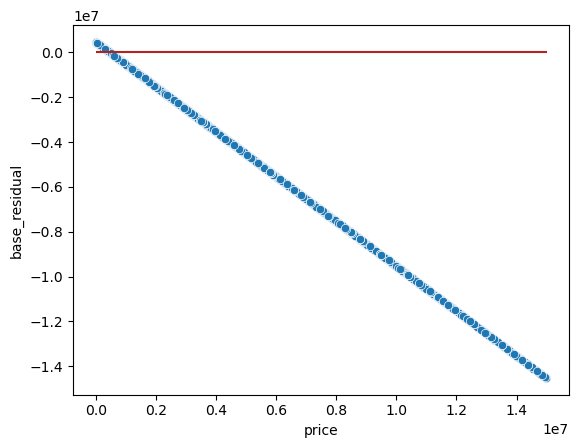

In [19]:
sns.scatterplot(data = results[results.price<15_000_000], x = 'price', y = 'base_residual')
plt.hlines(0, 0, 15_000_000, color='firebrick')

In [20]:
res = results[results.residual<10_000_000]

In [21]:
len([results.residual<10_000_000])

1

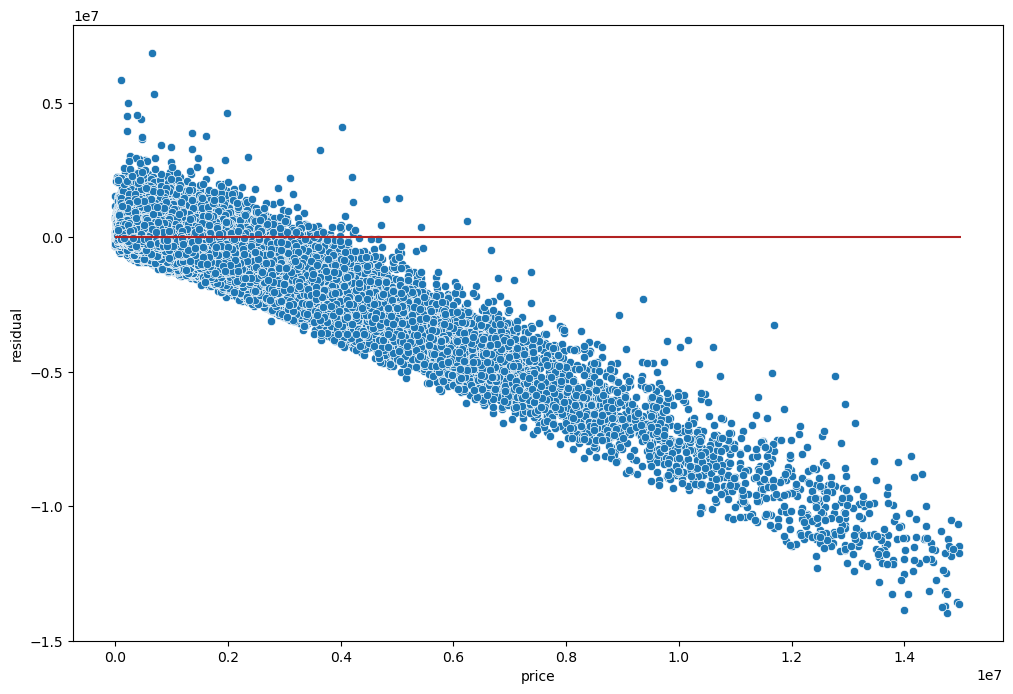

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = res[res.price<15_000_000], x = 'price', y = 'residual')
plt.hlines(0, 0, 15_000_000, color='firebrick')

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [23]:
results.head(3)

,price,baseline,base_residual,y_hat,residual
1816338,350540.0,460080.717969,109540.717969,638585.298373,288045.298373
1770176,425101.0,460080.717969,34979.717969,783524.928772,358423.928772
1033606,380546.0,460080.717969,79534.717969,588828.676991,208282.676991


In [24]:
results['residual^2'] = results.residual**2
SSE = results['residual^2'].sum()
SSE

4.744627319472977e+17

In [25]:
ESS = sum((results.y_hat - results.price.mean())**2)
ESS

2.048228965778069e+17

In [26]:
TSS = SSE + ESS
TSS

6.792856285251046e+17

In [27]:
MSE = SSE/len(results) 
MSE

316696124020.66644

In [28]:
from math import sqrt

RMSE = sqrt(MSE)
RMSE

562757.6068083544

## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [29]:
results['base_residual^2'] = results.base_residual**2
SSE_bl = results['base_residual^2'].sum()
SSE_bl

6.792856285253759e+17

In [30]:
ESS_bl = sum((results.baseline - results.price.mean())**2)
ESS_bl

0.0

In [31]:
TSS_bl = SSE_bl + ESS_bl
TSS_bl

6.792856285253759e+17

In [32]:
MSE_bl = SSE_bl/len(results) 
MSE_bl

453412062047.5301

In [33]:
RMSE_bl = sqrt(MSE_bl)
RMSE_bl

673358.7914682113

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [34]:
def compare_model_base(data, actual='', model='', baseline=''):
    df = data.copy()
    df['b_res'] = df[baseline] - df[actual] 
    df['m_res'] = df[model] - df[actual] 
    SSE_baseline = (df['b_res']**2).sum()
    SSE = (df['m_res']**2).sum()
    print(f'The model SSE was {SSE}.')
    print(f'The baseline SSE was {SSE_baseline}.')
    if SSE < SSE_baseline:
        print('The model did better.')
    else:
        print('The baseline did better.')

In [35]:
compare_model_base(results, 'price', 'y_hat', 'baseline')

The model SSE was 4.744627319472977e+17.
The baseline SSE was 6.792856285253759e+17.
The model did better.


## 7. What is the amount of variance explained in your model?

In [36]:
R_sqr = ESS/TSS
R_sqr_bl = ESS_bl/TSS_bl

R_sqr, R_sqr_bl

(0.30152691000180226, 0.0)

## 8. Is your model better than the baseline model?

In [37]:
# My model did better than the baseline. It had smaller residuals.

## 9. Create a file named evaluate.py that contains the following functions.

* plot_residuals(y, yhat): creates a residual plot
* regression_errors(y, yhat): returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [38]:
results.head(5)

,price,baseline,base_residual,y_hat,residual,residual^2,base_residual^2
1816338,350540.0,460080.717969,109540.717969,638585.298373,288045.298373,8.297009e+10,1.199917e+10
1770176,425101.0,460080.717969,34979.717969,783524.928772,358423.928772,1.284677e+11,1.223581e+09
1033606,380546.0,460080.717969,79534.717969,588828.676991,208282.676991,4.338167e+10,6.325771e+09
2093580,293831.0,460080.717969,166249.717969,587826.389213,293995.389213,8.643329e+10,2.763897e+10
1677414,470040.0,460080.717969,-9959.282031,597316.696196,127276.696196,1.619936e+10,9.918730e+07


TypeError: hlines() missing 1 required positional argument: 'xmax'

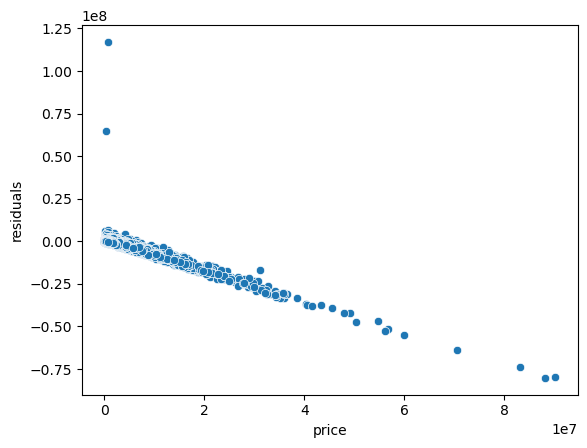

In [39]:
import evaluate as ev

ev.plot_residuals(results, 'price', 'y_hat',85_000_000)

In [ ]:
SSE, ESS, TSS, MSE, RMSE = ev.regression_errors(results, 'price', 'y_hat')

In [ ]:
SSE, ESS, TSS, MSE, RMSE

In [ ]:
SSE, MSE, RMSE = ev.baseline(results, 'price')
SSE, MSE, RMSE